In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [6]:
df = sns.get_dataset_names()
df

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
df= sns.load_dataset('taxis')
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [8]:
num_cols = df.select_dtypes('number').columns.tolist()
print(num_cols)

['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']


In [9]:
cat_cols = df.select_dtypes('object').columns
print(cat_cols)

Index(['color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough',
       'dropoff_borough'],
      dtype='object')


In [10]:
from sklearn.impute import SimpleImputer
one = SimpleImputer()
cal_imp = SimpleImputer(strategy = 'most_frequent')

In [11]:
df[num_cols] = one.fit_transform(df[num_cols])
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [12]:
pay = LabelEncoder()
df[['payment']] = cal_imp.fit_transform(df[['payment']])
pay = LabelEncoder()
df[['pickup_zone']] = cal_imp.fit_transform(df[['pickup_zone']])
pay = LabelEncoder()
df[['dropoff_zone']] = cal_imp.fit_transform(df[['dropoff_zone']])
pay = LabelEncoder()
df[['pickup_borough']] = cal_imp.fit_transform(df[['pickup_borough']])
pay = LabelEncoder()
df[['dropoff_borough']] = cal_imp.fit_transform(df[['dropoff_borough']])
df.head()
df.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder
cat = ['payment', 'color']
ohe = OneHotEncoder(drop = 'first')
encode = ohe.fit_transform(df[cat]).toarray()
encode_df = pd.DataFrame(encode , columns=ohe.get_feature_names_out(cat))
encode_df


,payment_credit card,color_yellow
0,1.0,1.0
1,0.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
6428,1.0,0.0
6429,1.0,0.0
6430,0.0,0.0
6431,1.0,0.0


<Axes: xlabel='distance', ylabel='fare'>

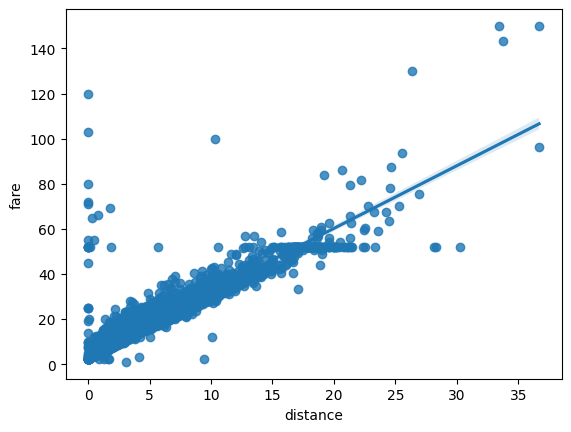

In [14]:
sns.regplot(x='distance', y = 'fare', data=df)

<Axes: xlabel='passengers', ylabel='fare'>

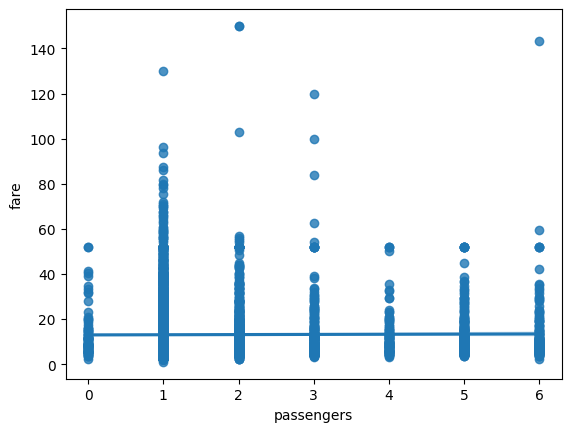

In [15]:
sns.regplot(x='passengers', y = 'fare', data=df)

In [16]:
a=cat=cat_cols

In [17]:
clean_df = pd.concat([df,encode_df], axis = 1).drop(a, axis = 1)
clean_df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,payment_credit card,color_yellow
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1.0,1.60,7.0,2.15,0.0,12.95,1.0,1.0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1.0,0.79,5.0,0.00,0.0,9.30,0.0,1.0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1.0,1.37,7.5,2.36,0.0,14.16,1.0,1.0
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1.0,7.70,27.0,6.15,0.0,36.95,1.0,1.0
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3.0,2.16,9.0,1.10,0.0,13.40,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1.0,0.75,4.5,1.06,0.0,6.36,1.0,0.0
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1.0,18.74,58.0,0.00,0.0,58.80,1.0,0.0
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1.0,4.14,16.0,0.00,0.0,17.30,0.0,0.0
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1.0,1.12,6.0,0.00,0.0,6.80,1.0,0.0


In [18]:
# Data Scaling
number_cols = df.select_dtypes(include =['int64', 'float64']).columns
scaler = StandardScaler()
clean_df[number_cols] = scaler.fit_transform(df[number_cols])
clean_df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,payment_credit card,color_yellow
0,2019-03-23 20:21:09,2019-03-23 20:27:24,-0.448004,-0.372199,-0.527324,0.069753,-0.229849,-0.403040,1.0,1.0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,-0.448004,-0.583821,-0.700471,-0.808383,-0.229849,-0.667255,0.0,1.0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,-0.448004,-0.432289,-0.484038,0.155524,-0.229849,-0.315451,1.0,1.0
3,2019-03-10 01:23:59,2019-03-10 01:49:51,-0.448004,1.221502,1.204142,1.703493,-0.229849,1.334266,1.0,1.0
4,2019-03-30 13:27:42,2019-03-30 13:37:14,1.213575,-0.225892,-0.354178,-0.359104,-0.229849,-0.370465,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,-0.448004,-0.594272,-0.743757,-0.375442,-0.229849,-0.880075,1.0,0.0
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,-0.448004,4.105839,3.887914,-0.808383,-0.229849,2.915937,1.0,0.0
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,-0.448004,0.291408,0.251835,-0.808383,-0.229849,-0.088153,0.0,0.0
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,-0.448004,-0.497605,-0.613898,-0.808383,-0.229849,-0.848225,1.0,0.0


In [19]:
X = clean_df.drop(columns=['fare'])   # features
y = clean_df['fare']                  # target

In [20]:
# train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
reg = LinearRegression()
reg.fit(X_train, y_train)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)